In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Yasmine Dawud
## April 16, 2023
## CS379-2302A-01
## Individual Project 2

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [6]:
#Read the CSV file
data = pd.read_csv("/kaggle/input/google-stock-price-daily-weekly-and-monthly-2023/google-stock-dataset-Daily.csv")
data.head()

,Unnamed: 0,Date,Price,High,Low,Close,Volume,Adj Close
0,0,2013-04-15,19.67,19.94,19.44,19.57,98025876,19.57
1,1,2013-04-16,19.68,19.92,19.62,19.85,69610320,19.85
2,2,2013-04-17,19.69,19.79,19.47,19.58,81398520,19.58
3,3,2013-04-18,19.65,19.66,19.05,19.17,132767100,19.17
4,4,2013-04-19,19.25,20.11,19.18,20.02,231895872,20.02


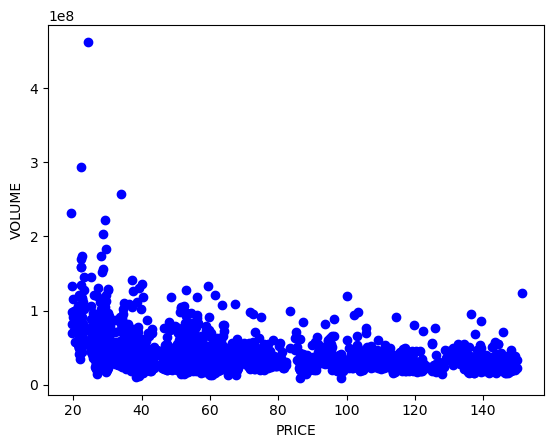

In [9]:
#Select some features to explore more
data = data[["Price","Volume"]]
#PRICE vs VOLUME
plt.scatter(data["Price"],data["Volume"], color="blue")
plt.xlabel("PRICE")
plt.ylabel("VOLUME")
plt.show()

In [13]:
#Generating training and testing data from our data
#We are using 80% data for training
train = data[:(int((len(data)*0.8)))]
test = data[(int((len(data)*0.8))):]

In [14]:
#Modeling
#Use sklearn package to model data
regr = linear_model.LinearRegression()
train_x = np.array(train[["Price"]])
train_y = np.array(train[["Volume"]])
regr.fit(train_x, train_y)

LinearRegression()

In [15]:
#The coefficients
print("Coefficients: ", regr.coef_) #slope
print("Intercept: ", regr.intercept_) #intercept

Coefficients:  [[-436696.17638149]]
Intercept:  [64012920.53337131]


Text(0, 0.5, 'VOLUME')

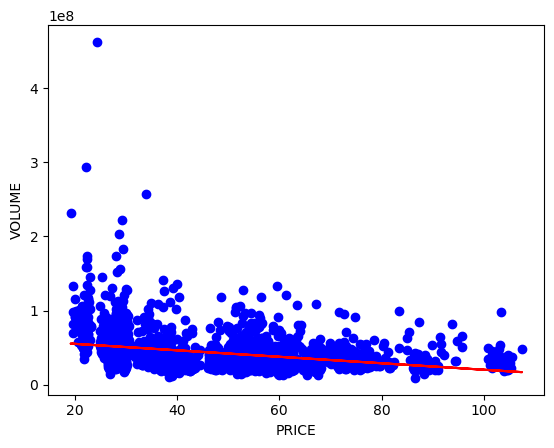

In [18]:
#Plotting the regression line
plt.scatter(train["Price"], train["Volume"],
           color = "blue")
plt.plot(train_x, regr.coef_*train_x+regr.intercept_,'-r')
plt.xlabel("PRICE")
plt.ylabel("VOLUME")

In [19]:
#predicting values
#function for predicting future values
def get_regression_predictions(input_features,intercept,slope):
    predicted_values = input_features*slope+intercept
    return predicted_values

In [22]:
#predicting future volume
my_price = 3.5
estimatd_volume=get_regression_predictions(my_price,regr.intercept_[0],regr.coef_[0][0])
print("Estimated Volume: ", estimatd_volume)

Estimated Volume:  62484483.9160361


In [24]:
#Checking various accuracy
from sklearn.metrics import r2_score
test_x = np.array(test[["Price"]])
test_y = np.array(test[["Volume"]])
test_y_ = regr.predict(test_x)
print("Mean absolute error: %.2f"%np.mean(np.absolute(test_y_-test_y)))
print("Mean sum of squares (MSE):%.2f"%np.mean((test_y_-test_y)**2))
print("R2-score:%.2f"%r2_score(test_y_,test_y))

Mean absolute error: 21226878.18
Mean sum of squares (MSE):672040645853158.25
R2-score:-9.42
